In [6]:
import numpy as np
import matplotlib.pyplot as plt
from alive_progress import alive_bar
import matplotlib.pyplot as plt
import pyarma as pa


In [77]:
#Probabilistic Cellular Automata
##probability of choosing the local rule

def f_cell(xl,x,xr,Lb):
    """ Chose the local rule with probability Lb and the null rule with probability 1-Lb"""
    if np.random.rand()>Lb:
        return 0
    else:
        return int(bin_rule[7-(xl*4+x*2+xr)])

def step_conf(x,Lb):
    """It gives the next configuration of the CA with periodic boundary conditions
    Args:
        x (_type_): configuration array of the CA at fixed time
        rule (_type_): local rule of the CA
    Returns:
        _type_: _description_
    """
    y=np.zeros(len(x)).astype(int)
    y[0]=f_cell(x[-1],x[0],x[1],Lb)
    for i in range(1,len(x)-1):
        y[i]=f_cell(x[i-1],x[i],x[i+1],Lb)
    y[-1]=f_cell(x[-2],x[-1],x[0],Lb)
    return y

def plot_conf(x):
    """Plot the configuration of the CA
    Args:
        x (_type_): configuration array of the CA at fixed time
    Returns:
        _type_: _description_
    """
    plt.figure(figsize=(10,10))
    plt.show()

def density(x):
    """It gives the density of the CA
    Args:
        x (_type_): configuration array of the CA at fixed time
    Returns:
        _type_: _description_
    """
    return np.sum(x)/len(x)
def fill_initial_configuration(x, rho):
    """It gives the initial configuration of the CA
    Args:
        x (array): configuration array of the CA at fixed time
        rho (float): density of the CA
    Returns:
        x (array) : random initial configuration of the CA with density rho 
    """
    x[:int(len(x)*rho)]=1
    np.random.shuffle(x)
    return x 



In [103]:
#System and simulation variables 
F2 =[18, 22, 26, 28, 30, 50, 54, 58, 60, 62, 78, 90, 94, 110, 122, 126, 146, 150, 154, 156, 158, 178, 182, 186, 188, 190, 202, 206, 218, 234, 238, 250, 254]
n=1e4 #number of cells
Time = int(5000) #number of time steps
x=np.zeros(int(n)).astype(int) #configuration array
rho=0.5 # initial density
x=fill_initial_configuration(x,rho) #initial configuration according to the density
#history of the configurations
h=x # copy the initial configuration hence we start from the same initial configuration for each Lb
#selection of the local rule randomly from F2
rule= 238#np.random.choice(F2) #randomly select a local rule from F2
print("The local rule is: ",rule)
bin_rule=np.binary_repr(rule, width=8) #binary representation of the local rule
print("The binary representation of the local rule is: ",bin_rule)
# print(bin_rule)
Lb0 = np.arange(0,0.65,0.05)
Lb1 = np.arange(0.61,0.79,0.01) #to be more precise in the region of the phase transition depends on the initial rule 
Lb2 = np.arange(0.8,1.05,0.05)
Lb = np.concatenate((Lb0,Lb1,Lb2)) #array of lambda values
print(Lb)
history = np.zeros((Time, int(n), len(Lb))) #history of the configurations
for i in range(len(Lb)):
    history[0,:,i]=x #initial configuration
upd = True #update the history of the configurations
densities=np.zeros(len(Lb)) #array of densities
temp_densities=np.zeros(300) #array of densities
fluctuations=np.zeros(len(Lb)) #array of fluctuations



The local rule is:  238
The binary representation of the local rule is:  11101110
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.61
 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75
 0.76 0.77 0.78 0.79 0.8  0.85 0.9  0.95 1.  ]


|████████████████████████████████████████| 37/37 [100%] in 21.0s (1.76/s)                                               
Density 1.0


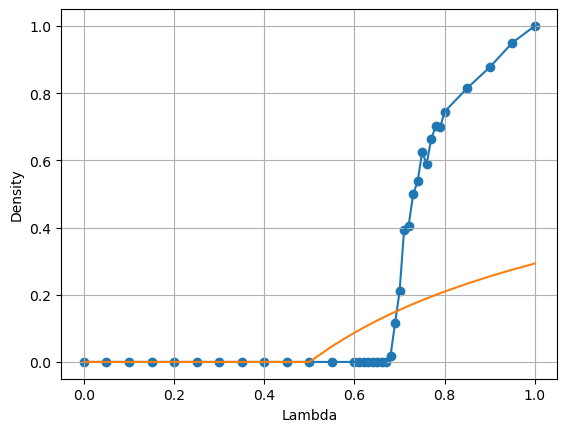

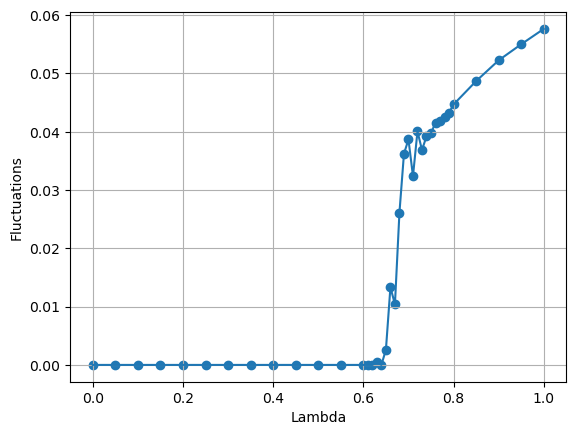

In [104]:
#to implement: upload every 0.05 lambda but near the phase transition upload every 0.01 lambda
# put more points near the phase transition
#Lb = np.linspace(0,1,100)
with alive_bar(len(Lb),force_tty=True) as bar:
    for i in range(0,len(Lb)):
        x=h
        for t in range(Time):
            x=step_conf(x,Lb[i])
            if upd:
                history[t,:,i]=x
            if t>Time-300:
                temp_densities[t-(Time-300)]=density(x)
        fluctuations[i]=np.std(temp_densities)
        densities[i] = density(x)
        bar()
#print("Density",density(x))
#print("Final  ", x)
print("Density",density(x))
plt.scatter(Lb,densities)
plt.plot(Lb,densities)
plt.xlabel("Lambda")
plt.ylabel("Density")
# over the same plot plot the theoretical density with mean field theory
#not implemented a proper function that solves the self consistent equation for the density for any lambda
mfd = np.zeros(len(Lb))
for i in range(len(Lb)):
    if Lb[i]<0.5:
        mfd[i] = 0
    else:
        mfd[i] = 1-np.sqrt(1/(2*Lb[i])) #2 - 1/(Lb[i]) for rule 238 # for rule 18 1-np.sqrt(1/(2*Lb[i]))
plt.plot(Lb,mfd)
#for rule 18 
plt.grid()
plt.show()
# plot the fluctuations
plt.scatter(Lb,fluctuations)
plt.plot(Lb,fluctuations)
plt.xlabel("Lambda")
plt.ylabel("Fluctuations")
plt.grid()
plt.show()



In [105]:
#plot the history of the configurations for a given lambda
print("Lambda = ",Lb)
#print("lamda_c", np.where(Lb[:] == 0.8)[0])
#save picture of the history of the configurations for a every lambda
for i in range(len(Lb)):
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.matshow(history[:,:,i], cmap=plt.cm.Blues)
    ax.axis(False);
    plt.savefig("./history/CA_{}_{}.png".format(rule,int(Lb[i]*100)))
    plt.close()


Lambda =  [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.61
 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75
 0.76 0.77 0.78 0.79 0.8  0.85 0.9  0.95 1.  ]


In [2]:
# Cellulare Automata Traffic flow model rule 184
import numpy as np
import matplotlib.pyplot as plt
from alive_progress import alive_bar
import matplotlib.pyplot as plt


In [100]:
# Implement the Cellular Automata Traffic flow model
n=100 #number of cells
Time = int(100) #number of time steps
x=np.zeros((Time,int(n))).astype(int) #configuration array
rho=0.80 # initial density
x[0,:]=fill_initial_configuration(x[0,:],rho) #initial configuration according to the density
rule=184 #local rule
bin_rule=np.binary_repr(rule, width=8) #binary representation of the local rule
print(bin_rule)

10111000


In [101]:
#simulation of traffic flow
time_array=np.arange(Time)
for t in range(1,len(time_array)):
    x[t,:]=step_conf(x[t-1,:],1)
    

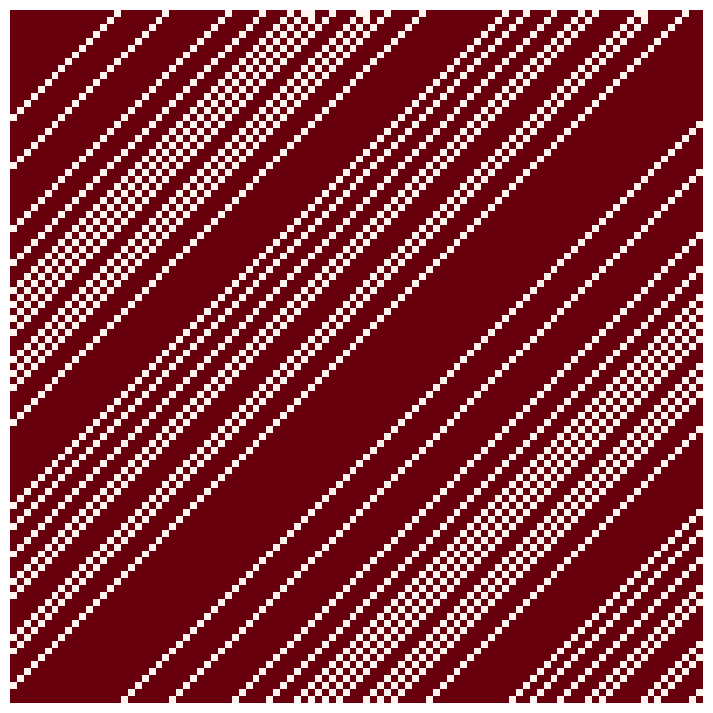

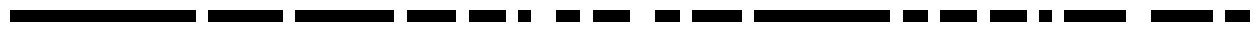

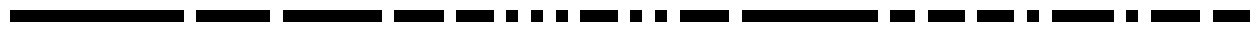

In [102]:
#plot the x configuration over time the ones in black and the zeros in white
fig, ax = plt.subplots(figsize=(16, 9))
ax.matshow(x, cmap=plt.cm.Reds)
ax.axis(False);
# plot the first row of the configuration array
fig, ax = plt.subplots(figsize=(16, 9))
ax.matshow(x[0:1,:], cmap='binary')
ax.axis(False);
# plot the second row of the configuration array
fig, ax = plt.subplots(figsize=(16, 9))
ax.matshow(x[1:2,:], cmap='binary')
ax.axis(False);


MovieWriter imagemagick unavailable; using Pillow instead.


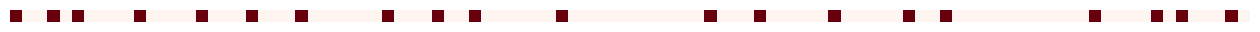

In [75]:
from matplotlib import animation 
from IPython.display import HTML
# do the animation over xof the configurations
fig, ax = plt.subplots(figsize=(16, 9))
ax.matshow(x, cmap=plt.cm.Reds)
#save plot
ax.axis(False);
plt.savefig("Traffic.png")
def animate(i):
    # update the data and plot only one line and delete the previous one
    ax.matshow(x[i:i+1,:], cmap=plt.cm.Reds)
    ax.axis(False);
anim = animation.FuncAnimation(fig, animate, frames=Time, interval=1000)
anim.save('animation.gif', writer='imagemagick', fps=30)
## More improvements can be done by changing the max velocity and the density of the cars, allowing for example to more complex rules
# if the cars see 2 empty cells they can move 2 cells forward

